# <font color='red'> TUTORIAL ON NETWORK VALIDATION </font>

## Standard modules

In [ ]:
# this piece of code load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
# tqdm permits to use progress bars
from tqdm.notebook import trange, tqdm

In [ ]:
# this code move to the shared drive contents
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('drive/Shareddrives/Labs/Group1/data')

Mounted at /content/drive


In [ ]:
# install bicm python module
!pip install bicm
# import some functions therein
from bicm import BipartiteGraph as BiG
from bicm.network_functions import sample_bicm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy.stats import spearmanr

## Specialties of the house
i.e. some functions that we defined in the previous lectures and we saved somewhere for later use. Since the present lecturer is particularly lazy, he shortened some of the names of the various functions.

In [ ]:
from ECUtils import nestedness_NODF as nodf
from ECUtils import rca
from ECUtils import fitness_complexity_algorithm as fi_co

## Something annoying
Sometimes some of the package turn on some uninteresting and sort of annoying warnings. Let us disable them.

In [ ]:
from numba.core.errors import NumbaExperimentalFeatureWarning
import warnings
warnings.simplefilter('ignore', category=NumbaExperimentalFeatureWarning)

# BiCM and variations 
The BiCM null-model presented this morning by prof. Cimini may seem quite complicated. Luckily enough you can find its implementation in the **bicm** python module (more details can be found on its [readthedocs](https://bipartite-configuration-model.readthedocs.io/en/latest/)  and [GitHub](https://bipartite-configuration-model.readthedocs.io/en/latest/)).

**References**:  

-- G. Cimini, T. Squartini, F. Saracco, D. Garlaschelli, A. Gabrielli, and G. Caldarelli. The statistical physics of real-world networks. Nature Reviews Physics, 1(1):58–71, 2019. doi:10.1038/s42254-018-0002-6.  
-- N. Vallarano, M. Bruno, E. Marchese, G. Trapani, F. Saracco, G. Cimini, M. Zanon, and T. Squartini. Fast and scalable likelihood maximization for exponential random graph models with local constraints. Scientific Reports, 11(1):15227, 2021. doi:10.1038/s41598-021-93830- 4

## Example: Southern women graph

Southern women graph is a sort of standard in the analysis of complex (bipartite) networks since it is quite small and its structure is evident. It was collected by a group of sociologists in 1941 to highlight the division in groups in the upper class white women in a town in the South of US. The bipartite network has the various women on one layer and informal social events (i.e. private parties or barbecues) on the opposite one. See Davis, A. et al, Deep South (1941), The University of Chicago Press, for all information; for a short introduction see, for instance, [the description present in the UNIrvine repository of Network Data](https://networkdata.ics.uci.edu/netdata/html/davis.html).

In [ ]:
# read the adjacency matrix
biadj_pd = pd.read_csv('network/adj_southern_women.csv', index_col=0)

In [ ]:
biadj_pd

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
idx,,,,,,,,,,,,,,
1,0,1,1,1,1,1,1,1,0,0,0,0,0,0
2,1,1,1,0,1,1,1,0,1,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,0,0,0,0,0
4,1,0,1,1,1,1,1,0,1,0,0,0,0,0
5,0,0,1,1,1,0,0,0,1,0,0,0,0,0
6,0,0,1,0,1,1,1,0,0,0,0,0,0,0
7,0,0,0,0,1,1,1,0,1,0,0,0,0,0
8,0,0,0,0,0,1,1,1,0,0,0,0,0,0
9,0,0,0,0,1,0,1,1,1,0,0,0,0,0


Rows are the various women, while columns are the events. Using the present ordering, it is quite clear the division in groups:

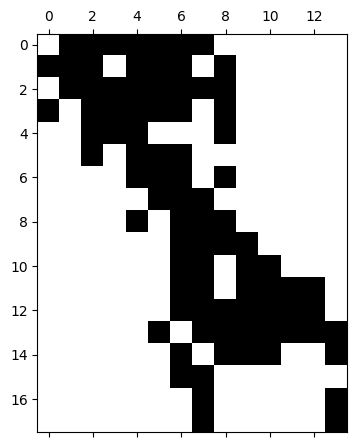

In [ ]:
colormap = 'binary'
plt.matshow(biadj_pd, cmap = colormap)
plt.show()

Let us use this small example to check how the bicm module works. First, we have to define an instance of the bicm. Traditionally, it is call myGraph

In [ ]:
myGraph=BiG()

Let's feed BiG with a pandas Data Frame:

In [ ]:
myGraph.set_biadjacency_matrix(biadj_pd)

TypeError: ignored

Ok, first obstacle: bicm does not like pandas. No harm done, let's convert the DataFrame to a numpy array.

In [ ]:
biadj_np=biadj_pd.to_numpy()

In [ ]:
myGraph.set_biadjacency_matrix(biadj_np)

It works!

### BiCM Fitness calculation  (_BiCM_ Fitness is not _Economic_ Fitness!)
bicm python module calculates the parameters of the Bipartite Configuration Model (aka BiCM) for a bipartite network. It has many interesting features, but for the moment we will focus on the most basic ones. For instance, for the moment we will use the default options to solve the equations defining the null-model.

In [ ]:
myGraph.solve_tool()

max rows error = 5.939719827097178e-10
max columns error = 4.963453648088034e-09
total error = 1.3615396809996128e-08
Solver converged.


The solver converged with a good precision.  
Ok, cool! But where are the parameters of bicm null-model?  
  (In order to confuse you once more, their standard name in Network Theory is _fitness_, believe it or not.)   
  In the formulation of the original paper, $x$s are the fitnesses for nodes on the first layers (usually, rows) and $y$s are the fitnesses for nodes on the opposite layers (i.e., columns). Indeed...

In [ ]:
myGraph.x, myGraph.y

(array([1.57461382, 1.57461382, 2.2445565 , 1.57461382, 0.49677836,
        0.49677836, 0.49677836, 0.3080033 , 0.49677836, 0.49677836,
        0.49677836, 1.09858422, 1.57461382, 2.2445565 , 0.75214831,
        0.1694893 , 0.1694893 , 0.1694893 ]),
 array([0.14602394, 0.24167093, 0.67208849, 0.3574425 , 1.15823332,
        1.15823332, 6.39767682, 3.37698682, 1.95283058, 0.67208849,
        0.49858238, 0.24167093, 0.24167093, 0.3574425 ]))

Let's check if indeed $x$s are the fitnesses for rows...

In [ ]:
len(myGraph.x)==biadj_np.shape[0]

True

For completeness let's check that also $y$s are what we expect them to be.

In [ ]:
len(myGraph.y)==biadj_np.shape[1]

True

Ok, cool! But should I remember what is the functional form of the probability per links in terms of the parameters?    
**NO**.  
I mean, **YES**, but in the present case, bicm does the work for you: the instance avg_mat contains the probability matrix associated to the original biadjacency matrix.

In [ ]:
myGraph.avg_mat

array([[0.18694647, 0.27564491, 0.51415741, 0.36013673, 0.64586353,
        0.64586353, 0.90969734, 0.84170829, 0.75459846, 0.51415741,
        0.43979936, 0.27564491, 0.27564491, 0.36013673],
       [0.18694647, 0.27564491, 0.51415741, 0.36013673, 0.64586353,
        0.64586353, 0.90969734, 0.84170829, 0.75459846, 0.51415741,
        0.43979936, 0.27564491, 0.27564491, 0.36013673],
       [0.24685127, 0.35167827, 0.60136184, 0.44515338, 0.72220063,
        0.72220063, 0.93489561, 0.88344768, 0.81423822, 0.60136184,
        0.52810073, 0.35167827, 0.35167827, 0.44515338],
       [0.18694647, 0.27564491, 0.51415741, 0.36013673, 0.64586353,
        0.64586353, 0.90969734, 0.84170829, 0.75459846, 0.51415741,
        0.43979936, 0.27564491, 0.27564491, 0.36013673],
       [0.06763517, 0.10718821, 0.25030682, 0.15079337, 0.36523463,
        0.36523463, 0.76066406, 0.62653317, 0.49241773, 0.25030682,
        0.19851561, 0.10718821, 0.10718821, 0.15079337],
       [0.06763517, 0.10718821, 0.2

Let's check if dimensions are correct.

In [ ]:
myGraph.avg_mat.shape==biadj_np.shape 

True

**Question**: why is it called "_Average matrix_"?

Is it properly reconstructing the degree sequence?

In [ ]:
np.abs(np.sum(myGraph.avg_mat, axis=0)-np.sum(biadj_np, axis=0))

array([9.33919608e-11, 1.27950095e-10, 2.04765982e-10, 1.61746172e-10,
       2.00595096e-10, 2.00595096e-10, 4.96345365e-09, 6.23323615e-11,
       1.28899558e-10, 2.04765982e-10, 1.89498195e-10, 1.27950095e-10,
       1.27950095e-10, 1.61746172e-10])

It depends what you mean by _properly_: here we can see that the greatest absolute error in reproducing the degree sequence (i.e. a list of integers) is less that $5\times10^{-9}$, therefore my opinion is **YES**!

In [ ]:
np.all(np.abs(np.sum(myGraph.avg_mat, axis=0)-np.sum(biadj_np, axis=0))<5*10**-9)

True

In [ ]:
np.all(np.abs(np.sum(myGraph.avg_mat, axis=1)-np.sum(biadj_np, axis=1))<10**-8)

True

Being extremely meticulous, let's check the relative errors:

In [ ]:
np.abs(np.sum(myGraph.avg_mat, axis=0)-np.sum(biadj_np, axis=0))/np.sum(biadj_np, axis=0)

array([4.66959804e-11, 4.26500317e-11, 3.41276637e-11, 4.04365430e-11,
       2.50743870e-11, 2.50743870e-11, 3.54532403e-10, 5.19436346e-12,
       1.28899558e-11, 3.41276637e-11, 3.78996390e-11, 4.26500317e-11,
       4.26500317e-11, 4.04365430e-11])

In [ ]:
np.abs(np.sum(myGraph.avg_mat, axis=1)-np.sum(biadj_np, axis=1))/np.sum(biadj_np, axis=1)

array([4.74909001e-11, 4.74909001e-11, 3.41106032e-11, 4.74909001e-11,
       8.77889983e-11, 8.77889983e-11, 8.77889983e-11, 3.07389669e-11,
       8.77889983e-11, 8.77889983e-11, 8.77889983e-11, 6.49715837e-11,
       4.74909001e-11, 3.41106032e-11, 8.26686275e-11, 2.96985991e-10,
       2.96985991e-10, 2.96985991e-10])

Those are even lower!

### Sampling from the ensemble

bicm python module is clever enough to sample from the bicm ensemble (**Question**: what is it?). Just give it a probability matrix and it will do the job for you.

In [ ]:
ex0=sample_bicm(myGraph.avg_mat)

In order to understand what it is happening, let's calculate the degree sequence of the rows of the sampled matrix.

In [ ]:
ex0

array([[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]])

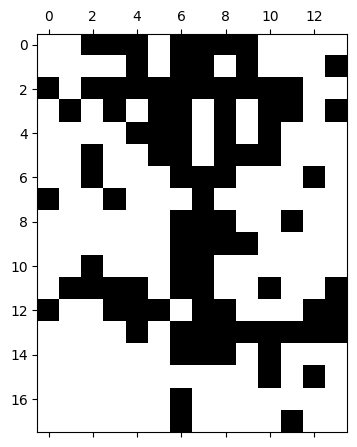

In [ ]:
colormap = 'binary'
plt.matshow(ex0, cmap = colormap)
plt.show()

In [ ]:
k_rows_ex0=np.sum(ex0, axis=1)
k_rows_ex0

array([ 7,  5, 11,  8,  5,  6,  5,  3,  4,  4,  3,  8,  8,  9,  4,  2,  1,
        2])

Is it equal to the real degree sequence (on the row layer)?

In [ ]:
k_rows_ex0==np.sum(biadj_np, axis=1)

array([ True, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False,  True, False,  True])

Did it happen by chance or it should be the standard?

In [ ]:
ex1=sample_bicm(myGraph.avg_mat)

In [ ]:
k_rows_ex1=np.sum(ex1, axis=1)

In [ ]:
k_rows_ex1==np.sum(biadj_np, axis=1)

array([False, False, False, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True, False, False, False,  True])

In [ ]:
k_rows_ex1==k_rows_ex0

array([False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True,  True])

**Question**: does it makes sense?

### NODF again

Let us use it to calculate the significance of the observed NODF. Let's start by claculating NODF on the real network.

In [ ]:
sw_nodf=nodf(biadj_np)
print(sw_nodf)

0.3006001170960187


In [ ]:
lsample=1000

In [ ]:
random_sw_nodf=np.zeros(lsample)
for i in trange(lsample):
    random_matrix=sample_bicm(myGraph.avg_mat)
    random_sw_nodf[i]=nodf(random_matrix)

  0%|          | 0/1000 [00:00<?, ?it/s]

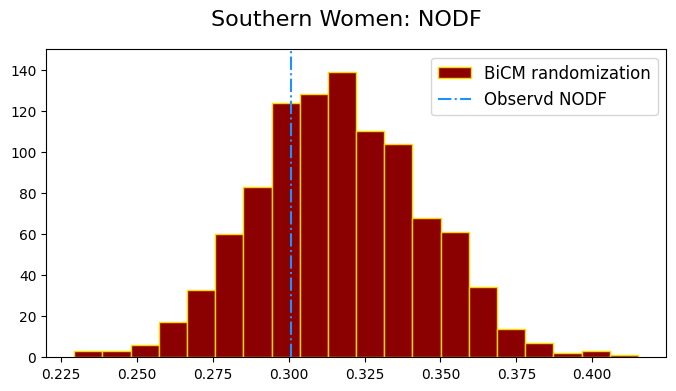

In [ ]:
plt.figure(figsize=(8, 4))
# plot the histogram and choose colors to celebrate the "Maggic" Roma
plt.hist(random_sw_nodf, bins=20, fc='darkred', ec='gold', label='BiCM randomization')
# plot a vertical line indicating the value observed in the real network
plt.vlines(sw_nodf, 0, 200, color='dodgerblue', linestyle='-.', label='Observd NODF')
plt.ylim(0, 150)
plt.legend(fontsize=12, loc='upper right')
plt.suptitle('Southern Women: NODF', fontsize=16)
plt.show()

In [ ]:
np.average(random_sw_nodf)

0.316501721548033

So, the NODF observed in the real network is in line with the expectation given the degree sequences.

### **Exercise**! Is the NODF measured on the export matrix of 2015 statistically significant? And on the technology matrix of the same year?

# Network validation: the assist matrix

For the moment, we know enough about how bicm works. Let's target some real problem, instead of some toy bipartite network.

## Assist matrix for the relatedness
Do you remember the asssist matrix that you meet a couple of days ago?
As you saw, you can have two different matrices $M_{cp}$ in order to highlight non trivial correlation bettween, say, export at different time or, for instance, patent registration and export. These correlations are captured by the number of countries that, say, are able to export a given product $p$ at time $t$ and, in principle, a different product $p'$ after a time $\delta t$.     
In order to state if these co-occurrences are significant or not, we can compare the observation on the real matrix with the proper null-model, exactly as we just did with the nestedness. In the present case, as an example, we will study the assist matrix between export matrices at different times, i.e. if the matrices of export at time $t$ and $t+\delta t$ are respectively $M_{cp}$  and $M'_{cp'}$, then:
$$
\large AM_{p p'}(t, \delta t) =\frac{1}{u_p(t)} \sum_{c}\frac{M_{c p}(t) M'_{c p'}(t+\delta t)}{d'_c (t+\delta t)} $$


**References**:  
-- Zaccaria, A., Cristelli, M., Tacchella, A., & Pietronero, L. (2014). How the taxonomy of products drives the economic development of countries. PloS one, 9(12), e113770.  
-- Pugliese, E., Cimini, G., Patelli, A., Zaccaria, A., Pietronero, L., & Gabrielli, A. (2019). Unfolding the innovation system for the development of countries: coevolution of Science, Technology and Production. Scientific reports, 9(1), 1-12. 

Note that in principle $M$ and $M'$, even if they have the same number of rows (i.e. _countries_), they may have different number of columns (i.e. _products_). In the following we will consider $\delta t=5y$.

In [ ]:
# let us consider an interval of 5 years
delta_t=5

### Functions

$$
\large AM_{p p'}(t, \delta t) =\frac{1}{u_p(t)} \sum_{c}\frac{M_{c p}(t) M'_{c p'}(t+\delta t)}{d'_c (t+\delta t)} $$


The function is also present in ECUtils.py

In [ ]:
def assist(m_0, m_1):
    d_1=m_1.sum(1)
    # let us automatically select the non-empty rows in m_1
    # and consider the summation just on them
    _m_0=m_0[d_1>0]
    _m_1=m_1[d_1>0]
    d_1=d_1[d_1>0]
    # let conside the second matrix term of the assist matrix
    mm_1=np.divide(_m_1.T, d_1).T
    
    # regarding the first term, there is the issue that if I have a product with
    # zero ubiquity, then the assist matrix will explode. In that case all
    # M_{cp} will be zero. Let's use a trick, then: let's calculate all ubiquities and
    # manually set to 1 all the 0 ones: their contribution will be still 0 (due to the numerator), 
    # but we will avoid dividing by 0 in the following (and making things explode)
    u_0=_m_0.sum(0)
    # manually set to 1 all the 0s
    u_0[u_0==0]=1
    mm_0=np.divide(_m_0, u_0)
    return np.dot(mm_0.T,mm_1)

### Data cleaning again

Let's make a To-Do list of things to be checked in the data:
1. no empty columns in the **export data** (due to **RCA** calculation);
2. no empty rows in the **export data** (as above);
3. consider only countries that belongs to both datasets, i.e. all $c$ for which both $M_{cp}$ and $M'_{cp'}$ are defined.


##### _No empty columns in the **export data**_

In [ ]:
exp_files=np.sort([file for file in os.listdir('./export/') if file[:6]=='export'])

In [ ]:
exp_files

array(['export_sitc_rev2_1990.csv', 'export_sitc_rev2_1991.csv',
       'export_sitc_rev2_1992.csv', 'export_sitc_rev2_1993.csv',
       'export_sitc_rev2_1994.csv', 'export_sitc_rev2_1995.csv',
       'export_sitc_rev2_1996.csv', 'export_sitc_rev2_1997.csv',
       'export_sitc_rev2_1998.csv', 'export_sitc_rev2_1999.csv',
       'export_sitc_rev2_2000.csv', 'export_sitc_rev2_2001.csv',
       'export_sitc_rev2_2002.csv', 'export_sitc_rev2_2003.csv',
       'export_sitc_rev2_2004.csv', 'export_sitc_rev2_2005.csv',
       'export_sitc_rev2_2006.csv', 'export_sitc_rev2_2007.csv',
       'export_sitc_rev2_2008.csv', 'export_sitc_rev2_2009.csv',
       'export_sitc_rev2_2010.csv', 'export_sitc_rev2_2011.csv',
       'export_sitc_rev2_2012.csv', 'export_sitc_rev2_2013.csv',
       'export_sitc_rev2_2014.csv', 'export_sitc_rev2_2015.csv',
       'export_sitc_rev2_2016.csv', 'export_sitc_rev2_2017.csv',
       'export_sitc_rev2_2018.csv', 'export_sitc_rev2_2019.csv',
       'export_sitc_rev2_

In [ ]:
for i_e_file, exp_file in enumerate(exp_files):
    # conside the i_e_file-th export file
    exp_np=pd.read_csv('./export/'+exp_file, index_col=0).to_numpy()
    # Let's define 
    # empty_cols_mask 
    # i.e. a numpy array of Booleans (i.e. either True or False)
    # depending if the column is an empty one or not.
    empty_cols_mask=exp_np.sum(axis=0)==0
    # summing a numpy array of Booleans return the number of Trues
    empty_cols=np.sum(empty_cols_mask)
    if empty_cols>0:
        # there is at least an empty column
        print('{:}) {:}: N(h=0)={:}'.format(i_e_file, exp_file, empty_cols))
    if i_e_file==0:
        # if it is the first file, 
        # I am considering its shape as a benchmark for the following files.
        exp_shape=exp_np.shape
    elif exp_shape!=exp_np.shape:
        # if the shape of the file is different from the previous element, write a message
        print('{:}) {:}: dimension(y-1)={:}; dimension(y)={:}'.format(i_e_file, exp_file, exp_shape, exp_np.shape))
        # update the file shape
        exp_shape=exp_np.shape

0) export_sitc_rev2_1990.csv: N(h=0)=1
1) export_sitc_rev2_1991.csv: N(h=0)=1
2) export_sitc_rev2_1992.csv: N(h=0)=1
3) export_sitc_rev2_1993.csv: N(h=0)=2
4) export_sitc_rev2_1994.csv: N(h=0)=2
5) export_sitc_rev2_1995.csv: N(h=0)=2
6) export_sitc_rev2_1996.csv: N(h=0)=3
7) export_sitc_rev2_1997.csv: N(h=0)=2
8) export_sitc_rev2_1998.csv: N(h=0)=3
9) export_sitc_rev2_1999.csv: N(h=0)=3
10) export_sitc_rev2_2000.csv: N(h=0)=3
11) export_sitc_rev2_2001.csv: N(h=0)=3
12) export_sitc_rev2_2002.csv: N(h=0)=3
13) export_sitc_rev2_2003.csv: N(h=0)=3
14) export_sitc_rev2_2004.csv: N(h=0)=3
15) export_sitc_rev2_2005.csv: N(h=0)=3
16) export_sitc_rev2_2006.csv: N(h=0)=3
17) export_sitc_rev2_2007.csv: N(h=0)=3
18) export_sitc_rev2_2008.csv: N(h=0)=3
19) export_sitc_rev2_2009.csv: N(h=0)=3
20) export_sitc_rev2_2010.csv: N(h=0)=3
21) export_sitc_rev2_2011.csv: N(h=0)=3
22) export_sitc_rev2_2012.csv: N(h=0)=3
23) export_sitc_rev2_2013.csv: N(h=0)=3
24) export_sitc_rev2_2014.csv: N(h=0)=3
25) export

So, the dimension of the matrices is constant, but there are some empty columns in all files. No harm done: we can remove them while calculating RCA: remember that while we have to consider the same countries for the export and technology matrices, there is not such a constraint for columns. Moreover, when calculating the assist matrix, we have to connect countries in the export matrices (the summation runs on countries), while we can skip the contribution of empty columns.

In [ ]:
exp_shape

(165, 186)

#### _No empty rows in the export data_ + _Consider only countries that belongs to both datasets_

In [ ]:
exp_pd=pd.read_csv('./export/'+exp_files[0], index_col=0)

In [ ]:
exp_pd.index

Index(['ABW', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ATG', 'AUS', 'AUT', 'AZE',
       ...
       'URY', 'USA', 'VCT', 'VEN', 'VNM', 'VUT', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', length=165)

Some countries do not have any exportation registered for some of the years for several reasons (among others 'SVN', Slovenia, did not exist in 1990, [Wikipedia](https://en.wikipedia.org/wiki/Slovenia)). Therefore we should select the country list as depending from the year.

In [ ]:
# let us define an empty list
country_lists=[]

for year in trange(1990, 2022-delta_t):
    # conside the year and get the export files for the two years under analysis
    exp_pd_0=pd.read_csv('./export/export_sitc_rev2_'+str(year)+'.csv', index_col=0)
    exp_pd_1=pd.read_csv('./export/export_sitc_rev2_'+str(year+delta_t)+'.csv', index_col=0)
    # remember to avoid empty rows!
    country_list=exp_pd_1.index[exp_pd_1.sum(axis=1)>0].to_numpy()
    # get the list of countries with no export data in t and convert it to numpy
    no_exp_c=exp_pd_0.loc[exp_pd_0.sum(1)==0].index.to_numpy()
    # exp_mask returns countries that have a non-zero export in t+\delta_t
    exp_mask=np.isin(country_list, no_exp_c, invert=True)
    country_lists.append(country_list[exp_mask])

  0%|          | 0/27 [00:00<?, ?it/s]

## Assist matrices calculation

In [ ]:
asm_matrices=[]
for year in trange(1990, 2022-delta_t):
    # load the export data at time t
    exp_pd_0=pd.read_csv('./export/export_sitc_rev2_'+str(year)+'.csv', index_col=0)
    # select just the allowed countries and convert it to numpy
    exp_np_0=exp_pd_0.loc[country_lists[year-1990]].to_numpy()
    # select non empty columns 
    k_e0_cols=exp_np_0.sum(0)
    exp_np_0=exp_np_0[:, k_e0_cols>0]
    # binarize!
    b_exp_np_0=np.array(np.where(rca(exp_np_0)>=1, 1, 0))
    # load the export data at time t+delta_t
    exp_pd_1=pd.read_csv('./export/export_sitc_rev2_'+str(year+delta_t)+'.csv', index_col=0)
    # select just the allowed countries and convert it to numpy
    exp_np_1=exp_pd_1.loc[country_lists[year-1990]].to_numpy()
    # select non empty columns 
    k_e1_cols=exp_np_1.sum(0)
    exp_np_1=exp_np_1[:, k_e1_cols>0]
    # binarize!
    b_exp_np_1=np.array(np.where(rca(exp_np_1)>=1, 1, 0))
    # calculate the assist matrix
    asm_np=assist(b_exp_np_0, b_exp_np_1)
    asm_matrices.append(asm_np)


  0%|          | 0/27 [00:00<?, ?it/s]

In [ ]:
asm_matrices[0]

array([[0.01744951, 0.0108731 , 0.01100632, ..., 0.00638161, 0.00167894,
        0.00716512],
       [0.01741284, 0.01880531, 0.01690065, ..., 0.00515982, 0.000999  ,
        0.00503941],
       [0.01671104, 0.01814251, 0.01898269, ..., 0.00386361, 0.0010661 ,
        0.00558331],
       ...,
       [0.        , 0.00669096, 0.00267663, ..., 0.01713463, 0.00292398,
        0.0085125 ],
       [0.00431034, 0.01128844, 0.00431034, ..., 0.00324675, 0.01338835,
        0.00324675],
       [0.01430856, 0.02038887, 0.01375106, ..., 0.0034632 , 0.00244837,
        0.0166175 ]])

Cool! But then? How to state if it is enough to carry some signal?

## Assist matrices validation 

Let us randomize intependently both export and technology matrices using bicm, calculate a sample and validate the observation. How big should the sample be? Let's say that we set the significance level at $\alpha=0.1$ (it is not praticularly conservative, but using CoLab and with our resolution of products it is ok): the effective Bonferroni threshold is $\alpha_{Bonf}=\alpha/N_{tests}$, where $N_{tests}$ is the dimension of the assist matrix. If I want to have enough resolution in order to state that the single p-value is significant, I have to build a sample that is big enough. 

In [ ]:
alpha=10**-1

In [ ]:
n_tests=exp_shape[1]**2

In [ ]:
alpha_bonf=alpha/n_tests
alpha_bonf

2.8905075731298416e-06

In [ ]:
'{:.2e}'.format(1/alpha_bonf)

'3.46e+05'

In [ ]:
# let's be geneorus
l_sample=5*10**5

In [ ]:
# choose the year and get the proper country list
year=2000

In [ ]:
country_list=country_lists[year-1990]

In [ ]:
# load the export data
exp_pd_0=pd.read_csv('./export/export_sitc_rev2_'+str(year)+'.csv', index_col=0)
# select just the allowed countries and convert it to numpy
exp_np_0=exp_pd_0.loc[country_lists[year-1990]].to_numpy()
# select non empty columns 
k_e0_cols=exp_np_0.sum(0)
exp_np_0=exp_np_0[:, k_e0_cols>0]
# binarize!
b_exp_np_0=np.array(np.where(rca(exp_np_0)>=1, 1, 0))
# so far, we just re-did what we did in the previous section.
# But now the time is come to: RANDOMIZE!
print('{:}) randomize the export matrix'.format(year))
myGraph=BiG(biadjacency=b_exp_np_0)
myGraph.solve_tool()
exp_am_0=myGraph.avg_mat.copy()
    

2000) randomize the export matrix
max rows error = 9.780069376574829e-08
max columns error = 7.196453566393757e-08
total error = 2.1957349424672756e-05
Solver converged.


In [ ]:
# load the export data
exp_pd_1=pd.read_csv('./export/export_sitc_rev2_'+str(year+delta_t)+'.csv', index_col=0)
# select just the allowed countries and convert it to numpy
exp_np_1=exp_pd_1.loc[country_lists[year-1990]].to_numpy()
# select non empty columns 
k_e1_cols=exp_np_1.sum(0)
exp_np_1=exp_np_1[:, k_e1_cols>0]
# binarize!
b_exp_np_1=np.array(np.where(rca(exp_np_1)>=1, 1, 0))
# so far, we just re-did what we did in the previous section.
# But now the time is come to: RANDOMIZE!
print('{:}) randomize the export matrix'.format(year+delta_t))
myGraph=BiG(biadjacency=b_exp_np_1)
myGraph.solve_tool()
exp_am_1=myGraph.avg_mat.copy()

2005) randomize the export matrix
max rows error = 1.2921623238071334e-07
max columns error = 1.0033531427922071e-07
total error = 2.7689077825243658e-05
Solver converged.


In [ ]:
asm_np=asm_matrices[year-1990]
asm_shape=asm_np.shape
p_values=np.zeros(asm_shape)

In [ ]:
for i in trange(l_sample, desc='Sampling...'):
    exp_sam_0=sample_bicm(exp_am_0)
    exp_sam_1=sample_bicm(exp_am_1)
    asm_sam=assist(exp_sam_0, exp_sam_1)
    # in order to avoid to save somewhere the information
    # about the entire sample, let's calculate on the fly 
    # the contribution of each sampled assist matrix to the p-value:
    # at the end of the day, at the present step, I just want to know
    # what is the probability (according to our null-model) 
    # of observing a value that is greater than the actual one
    asm_mask=asm_sam>=asm_np
    # so, update the p-value matrix
    p_values[asm_mask]+=1
print('sample complete!')
# so far each entry of p_values counts how many time the sampled value is greater 
# than the one observed in the real network. We have to properly normalize this probability
p_values/=l_sample    

Sampling...:   0%|          | 0/500000 [00:00<?, ?it/s]

sample complete!


In [ ]:
np.min(p_values)

0.0

In [ ]:
alpha_bonf

2.8905075731298416e-06

In [ ]:
# validate the p-values using Bonferroni
val_el=np.vstack(np.where(p_values<=alpha_bonf)).T

print('{:}-{:}: {:} links validated.\n'.format(year, year+delta_t, len(val_el)))

2000-2005: 2 links validated.



Indeed, our procedure is particulalry strict. Moreover, the less the resolution, the less variation you may have among your entries, the less the validated entries. Here, for timing  and data policy reasons, we are using aggregated data, therefore the number of validated entries in the assist matrix is quite limited.  

In [ ]:
p_values[p_values<=alpha_bonf]

array([0., 0.])

### Exercise: Consider the same assist matrix for y=2005 and $\delta t=5$. How many link do you validate?

# RCA as a network validation
_Under the hood_, RCA binarization is the comparison of real data with a null-model . In fact, 
$$
\mathbb{RCA}_{cp}=\dfrac{E_{cp}}{\dfrac{\sum_{c'} E_{c'p} \sum_{p'} E_{cp'}}{\sum_{c'',p''}E_{c''p''}}}=\dfrac{E_{cp}}{\langle E_{cp}\rangle_\text{Balassa}}. 
$$

Defing the marginals $E=\sum_c s_c=\sum_p\sigma_p=\sum_{c,p}E_{cp}$, we can more clearly write $\langle E_{cp}\rangle_\text{Balassa}=\dfrac{\sum_{c'} E_{c'p} \sum_{p'} E_{cp'}}{\sum_{c'',p''}E_{c''p''}}=\dfrac{\sigma_p s_c}{E}$.

The main philosophy of Balassa in defining RCA was to have a benchmark that preserves the total export of each country (i.e. $s_c$) and the global exportations for each product (i.e. $\sigma_p$) observed sin the real network. The proposal of Balassa (i.e. $\langle E_{cp}\rangle_\text{Balassa}$) satisfies these conditions (**CHECK!**). Nevertheless, there are some issues. Without entering into the details, the fact is that in RCA there is an intrinsic bias in the model definition since there are multiple ways to derive the parameters of the model, all of them equally correct. Using an entropy-based benchmark preserving the strenght sequences, i.e. the weighted extension of the BiCM (a.k.a. BiWCM), do the trick. bicm python module is smart enough to implement it. 

**References**:   
-- Balassa R. (1965). Trade Liberalisation and "Revealed" Comparative Advantage, 33(2), 99-123

-- M. Bruno, D. Mazzilli, A. Patelli, T. Squartini, F. Saracco, (2023). Inferring comparative advantage via entropy maximization, [arXiv:2304.12245](https://arxiv.org/abs/2304.12245)

Beside the fact that it is always important to have a properly defined benchmark, what is the error in using the RCA instead of BiWCM?  
Let's see...

## RCA vs. BiWCM


Let's start from 2015 export matrix.

In [ ]:
exp2015_pd=pd.read_csv('./export/export_sitc_rev2_2015.csv', index_col=0)

In [ ]:
exp2015_pd

,001,011,022,035,042,045,046,047,048,054,...,892,893,894,895,896,897,898,899,951,971
ABW,273072.0,2.432800e+04,7.420000e+02,50920.0,0.0,0.0,0.0,1952.0,23244.0,72206.0,...,1.086476e+06,87769.0,328119.0,15470.0,9856.0,1.030946e+07,12370.0,37588.0,20390.0,0.000000e+00
ALB,0.0,1.647424e+06,0.000000e+00,11860059.0,63074.0,0.0,34166.0,0.0,12537427.0,17632387.0,...,1.717310e+06,3879328.0,1332577.0,41186.0,0.0,1.997278e+06,0.0,1611890.0,0.0,0.000000e+00
AND,21746.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,878.0,72.0,1944.0,222.0,...,1.881218e+06,2512442.0,1487214.0,31906.0,3442172.0,4.447658e+06,573004.0,17995330.0,9234.0,5.942356e+06
ARE,33813059.0,2.455843e+07,1.051706e+09,12146167.0,922629397.0,4363827.0,64936686.0,10849804.0,348419739.0,150338675.0,...,1.701223e+09,716355993.0,218147003.0,81624491.0,206786881.0,2.198412e+10,24637712.0,169127710.0,14356118.0,3.263590e+10
ARG,3646000.0,1.742185e+09,1.282725e+09,25929011.0,312357887.0,346911779.0,298914084.0,5562079.0,303812862.0,543011099.0,...,1.187399e+08,134001059.0,18763605.0,2775331.0,3548407.0,5.915590e+05,2551061.0,44191295.0,14975514.0,4.529040e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VUT,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
YEM,0.0,1.800710e+05,1.921271e+07,5003099.0,448465.0,8896895.0,17260482.0,99114.0,7879134.0,37880366.0,...,6.980700e+04,1145054.0,2606.0,652.0,0.0,6.580000e+03,348.0,329608.0,0.0,3.304014e+06
ZAF,62539127.0,3.125602e+08,1.175828e+08,15112458.0,145756391.0,21669463.0,102564217.0,210428779.0,247002761.0,293696362.0,...,2.653452e+08,471012208.0,113269970.0,122288141.0,92020169.0,1.696589e+08,6365525.0,237537485.0,753924419.0,9.694499e+09
ZMB,6206192.0,9.644600e+04,4.535340e+05,190390.0,444004.0,1638386.0,32064124.0,2832982.0,29001530.0,8951936.0,...,1.091505e+08,2686784.0,158978.0,49144.0,940064.0,8.355740e+05,23942.0,6106288.0,29815816.0,1.839651e+08


In [ ]:
exp2015 = exp2015_pd.to_numpy()

In [ ]:
exp2015.shape

(165, 186)

Let us remove rows with no exports, if any.

In [ ]:
exp2015=exp2015[np.sum(exp2015, axis=1)>0]

In [ ]:
exp2015.shape

(152, 186)

Let us calculate also the strength sequence:

In [ ]:
s_c=np.sum(exp2015, axis=1)
sigma_p=np.sum(exp2015, axis=0)
tot_e = np.sum(exp2015)

### RCA

Inspired by the RCA functions written at day1...

In [ ]:
RCA_benchmark = np.tensordot(s_c,sigma_p, axes=0)/tot_e

Check!

In [ ]:
RCA_benchmark.shape==exp2015.shape

True

Let's check, for instance, what is the relative error in reconstructing the strength sequence.

In [ ]:
s_c_rca_dist=np.abs(np.sum(RCA_benchmark, axis=1)-s_c)/s_c

In [ ]:
'{:.4e}'.format(np.max(s_c_rca_dist))

'2.5936e-16'

In [ ]:
'{:.4e}'.format(s_c[np.where(s_c_rca_dist==np.max(s_c_rca_dist))[0][0]])

'1.1491e+08'

### BiWCM
Actually, we can consider weights as continuous or discrete. Since we are handling big volumes of export, the distinction between continuous and discrete null-models is negligible. Therefore we will consider the continuous ones, since it is easier to calculate. 

In [ ]:
myGraphW=BiG()

In [ ]:
myGraphW.set_biadjacency_matrix(exp2015)

Discrete weighted model: BiWCM_d


Let us force bicm to use the continuous null-model. 

In [ ]:
myGraphW.set_to_continuous()

In [ ]:
myGraphW.solve_tool()

max rows error = 3.219209060748425e-06
max columns error = 6.410928324268043e-06
total error = 3.84609139553226e-05
Solver converged.


Those are relative errors!

In [ ]:
s_c_biwcm_dist=np.abs(np.sum(myGraphW.avg_mat, axis=1)-s_c)

In [ ]:
'{:.4e}'.format(np.max(s_c_biwcm_dist))

'7.9366e+06'

In [ ]:
s_c_biwcm_dist=np.abs(np.sum(myGraphW.avg_mat, axis=1)-s_c)/s_c

In [ ]:
'{:.4e}'.format(np.max(s_c_biwcm_dist))

'3.2192e-06'

While it is not precise as RCA (and neither as its binary counterpart), the continuous BiWCM has a pretty nice precision.

### Benchmark matrix comparison
Let us compare the matrices obtained by comparing the volume of the export with the two benchmarks.

In [ ]:
RCA_m_cp=np.zeros(exp2015.shape, dtype=int)
biwcm_c_m_cp=np.zeros(exp2015.shape, dtype=int)
for c in trange(exp2015.shape[0]):
    for p in range(exp2015.shape[1]):
        if exp2015[c, p]>RCA_benchmark[c,p]:
            RCA_m_cp[c, p]=1
        if exp2015[c, p]>myGraphW.avg_mat[c,p]:
            biwcm_c_m_cp[c, p]=1

  0%|          | 0/152 [00:00<?, ?it/s]

#### Mere comparison

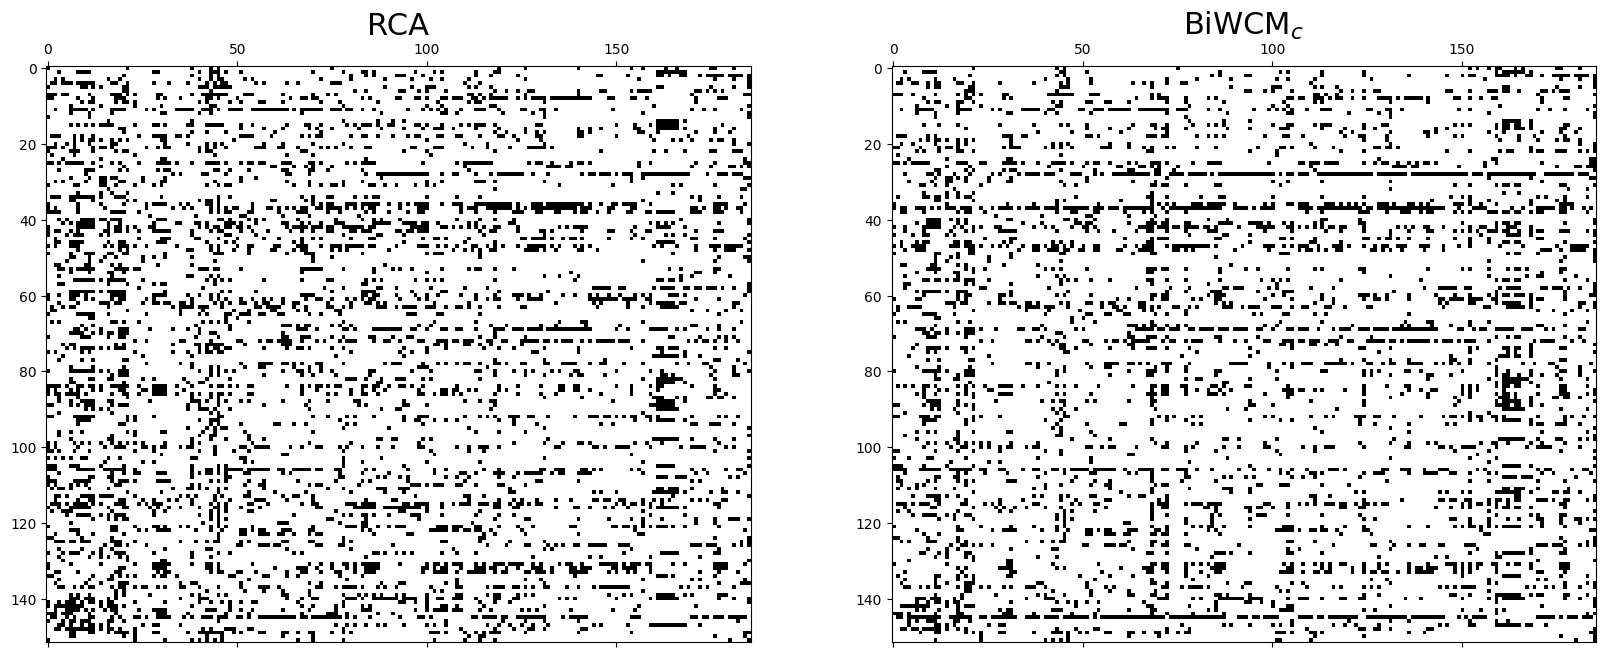

In [ ]:
fig, axs=plt.subplots(1, 2, figsize=(20,8))
axs[0].matshow(RCA_m_cp, cmap='binary')
axs[0].set_title('RCA', fontsize=22)
axs[1].matshow(biwcm_c_m_cp, cmap='binary')
axs[1].set_title('BiWCM$_c$', fontsize=22)
plt.show()

So what? Let's try using FC ordering for each matrix.

#### Fitness/complexity

##### FC ordering
Let's order the matrices according to their FC ordering:

In [ ]:
f_rca_2015, c_rca_2015=fi_co(RCA_m_cp)
f_biwcm_2015, c_biwcm_2015=fi_co(biwcm_c_m_cp)

In [ ]:
f_rca_2015_ord=np.argsort(-f_rca_2015)
c_rca_2015_ord=np.argsort(c_rca_2015)

In [ ]:
f_biwcm_2015_ord=np.argsort(-f_biwcm_2015)
c_biwcm_2015_ord=np.argsort(c_biwcm_2015)

In [ ]:
RCA_m_cp_fc_ord=RCA_m_cp[f_rca_2015_ord][:, c_rca_2015_ord]
biwcm_m_cp_fc_ord=biwcm_c_m_cp[f_biwcm_2015_ord][:, c_biwcm_2015_ord]

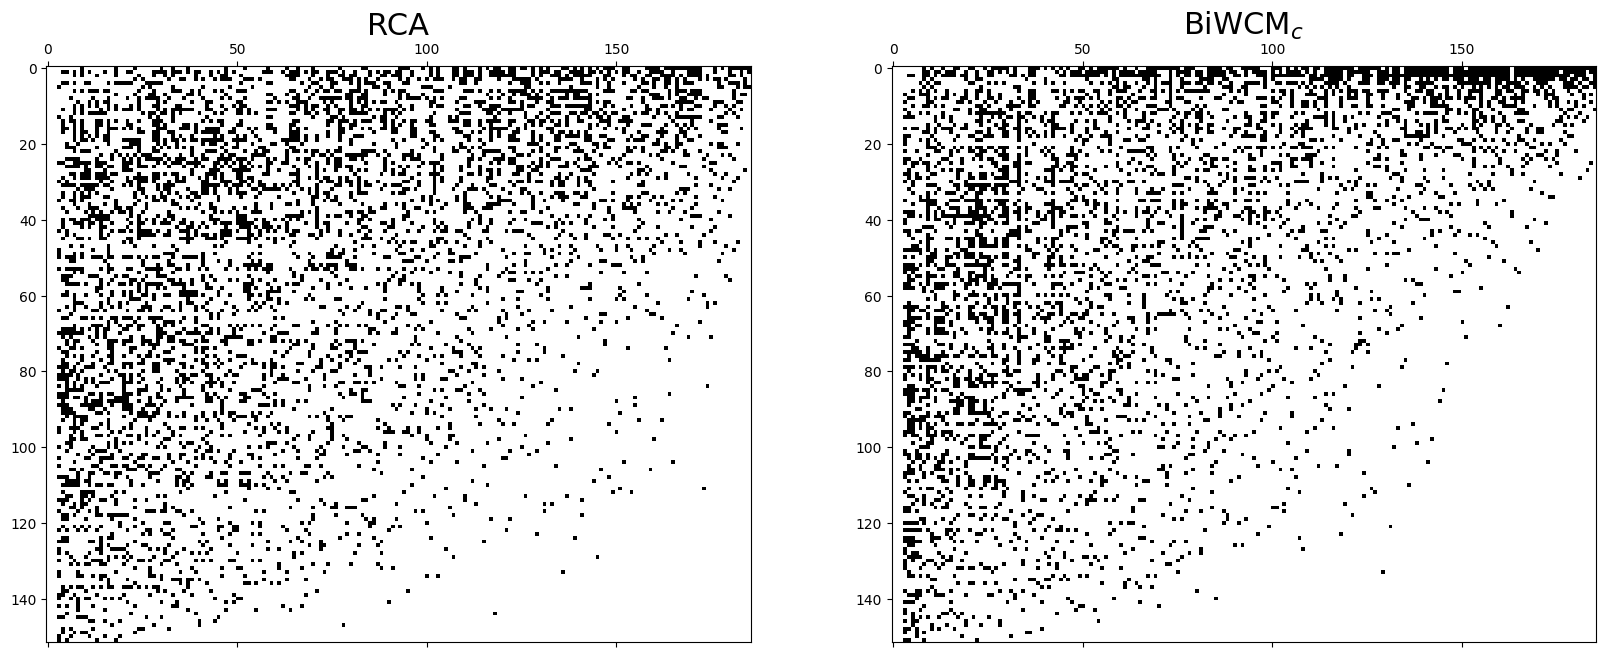

In [ ]:
fig, axs=plt.subplots(1, 2, figsize=(20,8))
axs[0].matshow(RCA_m_cp_fc_ord, cmap='binary')
axs[0].set_title('RCA', fontsize=22)
axs[1].matshow(biwcm_m_cp_fc_ord, cmap='binary')
axs[1].set_title('BiWCM$_c$', fontsize=22)
plt.show()

##### Density plots
Let's look at the link density

In each point we have the density of links of the window with the same proportion (ok, nearly...) of the entire matrix. It is useful in order to get an idea of the local link density.

In [ ]:
exp2015.shape

(152, 186)

In [ ]:
c_window, p_window=15, 19

In [ ]:
RCA_m_cp_rho=np.zeros(RCA_m_cp_fc_ord.shape)
for c in range(RCA_m_cp_fc_ord.shape[0]):
    for p in range(RCA_m_cp_fc_ord.shape[1]):
        # I have to define the lower border
        low_c=max([0, c-c_window//2])
        low_p=max([0, p-p_window//2])
        # actually the upper border issue is not present, 
        # since if it cannot find any element, 
        # numpy does not consider them
        RCA_w=RCA_m_cp_fc_ord[low_c:c+c_window//2, low_p:p+p_window//2]
        # count the number of links
        RCA_link_w=np.sum(RCA_w)
        # consider the dimension of the window
        RCA_dim_w=np.prod(RCA_w.shape)
        # get the density of links
        if RCA_dim_w>0:
            RCA_m_cp_rho[c, p]=RCA_link_w/RCA_dim_w

In [ ]:
biwcm_m_cp_rho=np.zeros(biwcm_m_cp_fc_ord.shape)
for c in range(biwcm_m_cp_fc_ord.shape[0]):
    for p in range(biwcm_m_cp_fc_ord.shape[1]):
        # I have to define the lower border
        low_c=max([0, c-c_window//2])
        low_p=max([0, p-p_window//2])
        # actually the upper border issue is not present, 
        # since if it cannot find any element, 
        # numpy does not consider them
        biwcm_w=biwcm_m_cp_fc_ord[low_c:c+c_window//2, low_p:p+p_window//2]
        # count the number of links
        biwcm_link_w=np.sum(biwcm_w)
        # consider the dimension of the window
        biwcm_dim_w=np.prod(biwcm_w.shape)
        # get the density of links
        if biwcm_dim_w>0:
            biwcm_m_cp_rho[c, p]=biwcm_link_w/biwcm_dim_w

The maximum and the minimum should be shared in order to compare the two matrices

In [ ]:
vmax=max(np.max(RCA_m_cp_rho), np.max(biwcm_m_cp_rho))
vmin=min(np.min(RCA_m_cp_rho), np.min(biwcm_m_cp_rho))

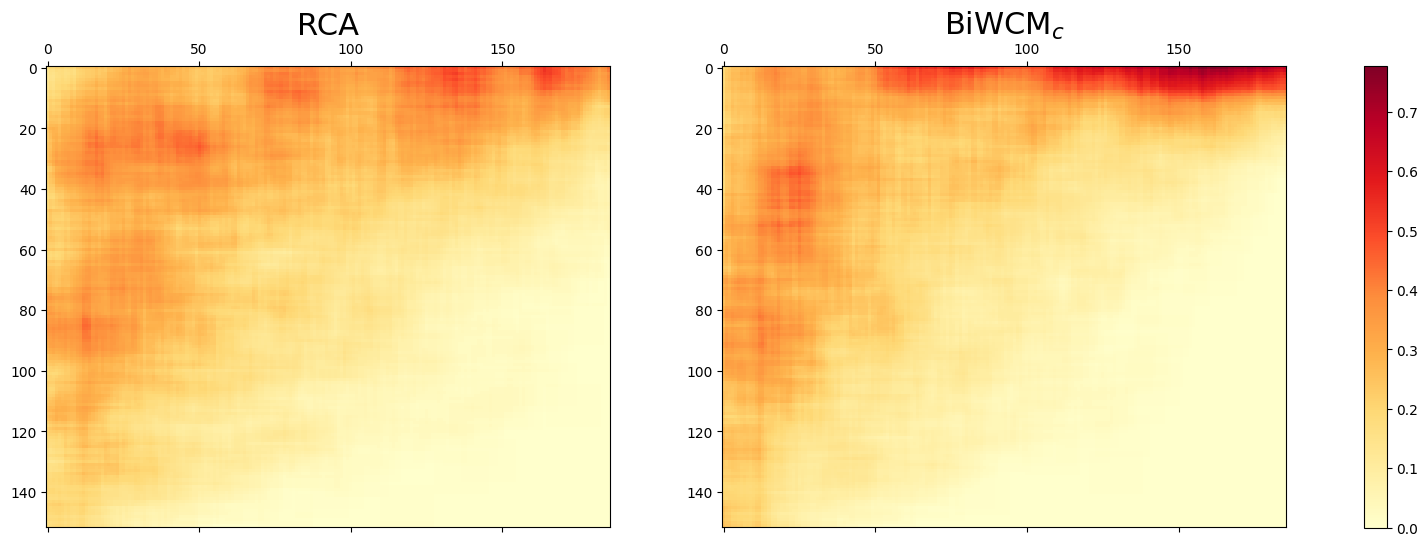

In [ ]:
fig, axs=plt.subplots(1, 2, figsize=(20,8))
axs[0].matshow(RCA_m_cp_rho, cmap='YlOrRd', vmin=vmin, vmax=vmax)
axs[0].set_title('RCA', fontsize=22)
axs[1].matshow(biwcm_m_cp_rho, cmap='YlOrRd', vmin=vmin, vmax=vmax)
axs[1].set_title('BiWCM$_c$', fontsize=22)
# the color bar definition is always a nightmare:
# first define the interval in which to Narmalize the colorbar
# (actually, something that under the hood marshow already did)
normalizer=Normalize(vmin,vmax)
# then map colors of cmap 'YlOrRd' in this interval
# (actually, something that under the hood marshow already did)
im=cm.ScalarMappable(norm=normalizer, cmap='YlOrRd')
# put the color bar somewhere nice, use the same cmap and shrink it a little
# in order to make it as high as the matrices
plt.colorbar(im, ax=axs.ravel().tolist(), cmap='YlOrRd', shrink=0.75)
plt.show()

Indeed there seems to be a greater density in the BiWCM upperright parte than oberved in RCA and a different pattern for low complexity products for medium countries. Should we do something better?

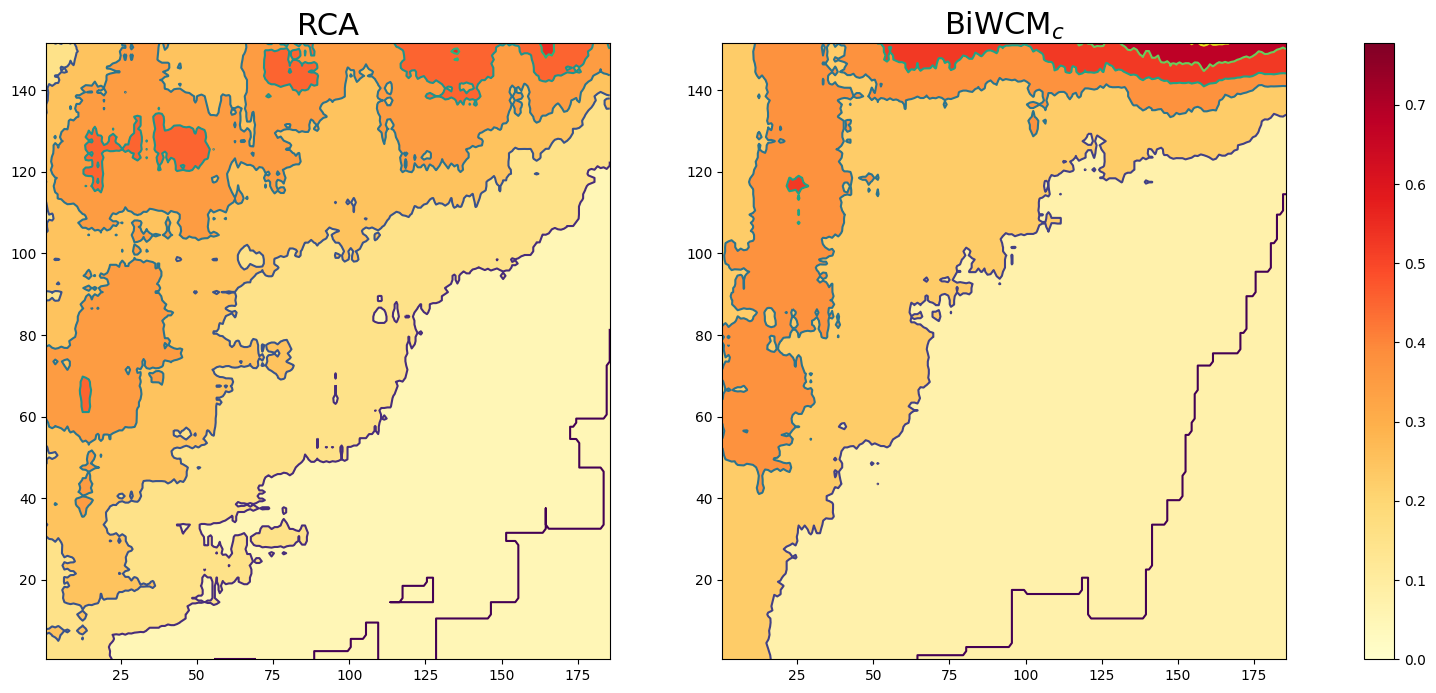

In [ ]:
fig, axs=plt.subplots(1, 2, figsize=(20,8))
axs[0].contourf(RCA_m_cp_rho, cmap='YlOrRd', vmin=vmin, vmax=vmax, levels=5, origin='upper')
axs[0].contour(RCA_m_cp_rho, vmin=vmin, vmax=vmax, levels=5, origin='upper')
# upper indicates where you want  your matrix to start from. Nicely, 
# the default of countour and countourf is opposite to matshow
axs[0].set_title('RCA', fontsize=22)
axs[1].contourf(biwcm_m_cp_rho, cmap='YlOrRd', vmin=vmin, vmax=vmax, levels=5, origin='upper')
axs[1].contour(biwcm_m_cp_rho, vmin=vmin, vmax=vmax, levels=5, origin='upper')
axs[1].set_title('BiWCM$_c$', fontsize=22)
# to place correctly the color bar 
# we have to write down the same magic formula as above 
normalizer=Normalize(vmin,vmax)
im=cm.ScalarMappable(norm=normalizer, cmap='YlOrRd')
plt.colorbar(im, ax=axs.ravel().tolist(), cmap='YlOrRd')
plt.show()

The countur plots show a neater profile od the density of links in the BiWCM validation.

### Correlations

In [ ]:
spearmanr(f_rca_2015, f_biwcm_2015)

SignificanceResult(statistic=0.9537107279300706, pvalue=3.622565563590414e-80)

In [ ]:
spearmanr(c_rca_2015, c_biwcm_2015)

SignificanceResult(statistic=0.7761405988767681, pvalue=1.0644353215130457e-38)

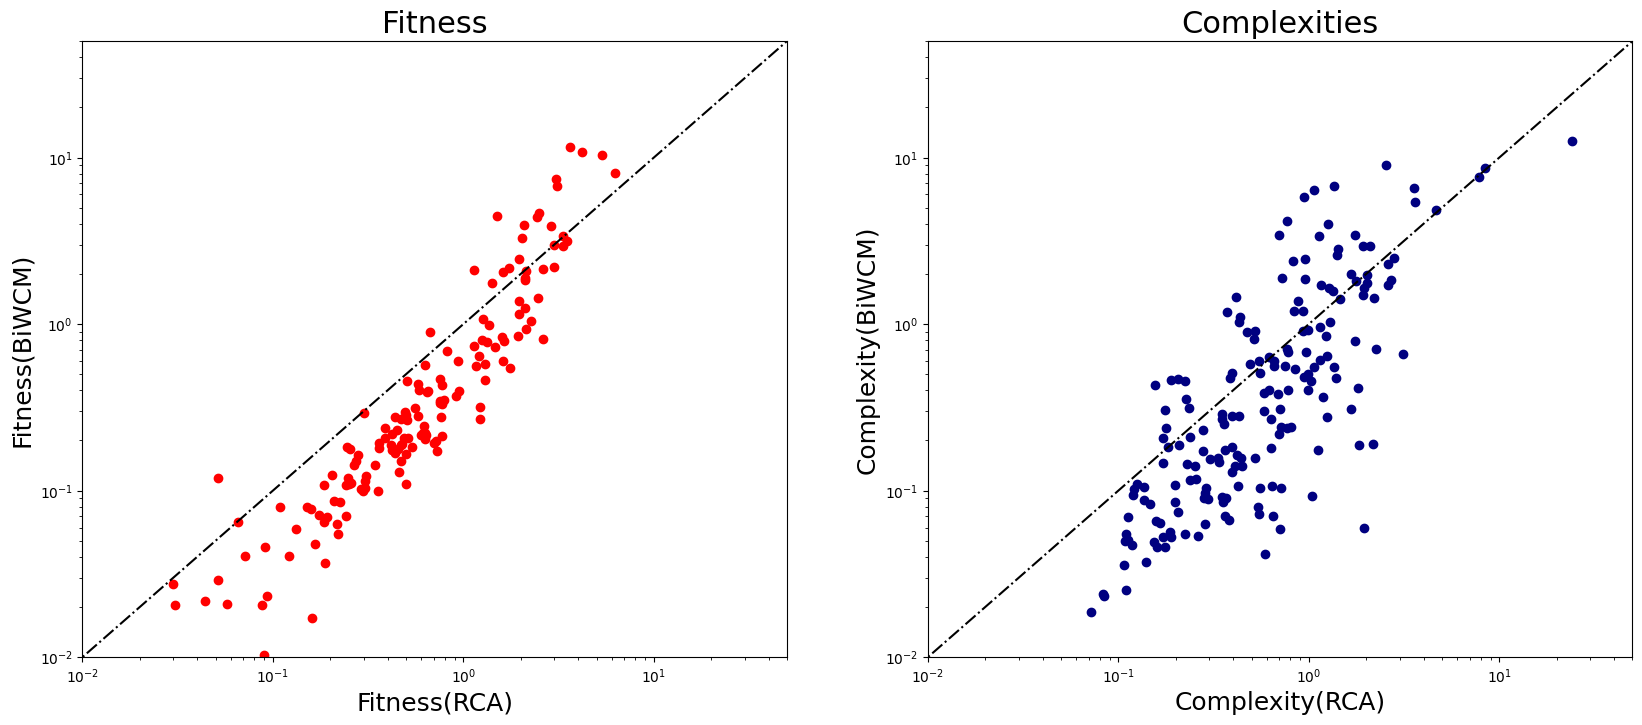

In [ ]:
fig, axs=plt.subplots(1, 2, figsize=(20,8))
# fitness
axs[0].scatter(f_rca_2015, f_biwcm_2015, color='r')
axs[0].set_title('Fitness', fontsize=22)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].plot([10**-5, 10**2],[10**-5, 10**2], linestyle='-.', color='black')
axs[0].set_xlim(10**-2, 10*5)
axs[0].set_ylim(10**-2, 10*5)
axs[0].set_xlabel('Fitness(RCA)', fontsize=18)
axs[0].set_ylabel('Fitness(BiWCM)', fontsize=18)

# complexity
axs[1].scatter(c_rca_2015, c_biwcm_2015, color='navy')
axs[1].set_title('Complexities', fontsize=22)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].plot([10**-5, 10**2],[10**-5, 10**2], linestyle='-.', color='black')
axs[1].set_xlim(10**-2, 10*5)
axs[1].set_ylim(10**-2, 10*5)
axs[1].set_xlabel('Complexity(RCA)', fontsize=18)
axs[1].set_ylabel('Complexity(BiWCM)', fontsize=18)

plt.show()

The difference between the two binarization is less evident in the fitnesses of countries. Otherwise stated, the "mistake" in using RCA instead of BiWCM is greater when considering products.

#### Exercise! Compare the RCA validation of 2015 employment matrix with the analogous BiWCM one (the output is the one of the slides of this morning).